### 1) 미니 프로젝트 배경

> 당신은 미국 민주당 선거대책본부 SNS 분석팀에서 자원봉사자 분석가로 활동하고 있습니다. 차기 대통령 선거에 출마가 유력한 경쟁후보인 트럼프 전 대통령의 트윗을 분석하는 프로젝트를 준비하고 있습니다. 프로젝트 기획서를 작성하기 위한 기초자료로 활용하기 위하여 트럼프의 과거 트윗을 분석하려고 합니다.


### 2) 미니 프로젝트 요구사항

- 1. 캐글([www.kaggle.com](http://www.kaggle.com))은 인공지능과 데이터 분석에 관심이 있는 전세계 분석가들이 모여서 활동하는 대표적인 커뮤니티입니다. 트럼프 대통령의 트윗 데이터셋([https://www.kaggle.com/datasets/austinreese/trump-tweets](https://www.kaggle.com/datasets/austinreese/trump-tweets))을 다운로드하여 내용을 분석합니다. 
2. Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글 수의 증감과 트위터 이용자들의 반응을 분석합니다. 
3. Pandas 라이브러리에서 내장된 plot 함수를 활용하여 분석 결과를 시각화하여 표현합니다. 그리고, 비정형 데이터인 트윗 텍스트를 시각화하기 위하여 WordCloud를 생성합니다.

### 진행시 주의사항
- [ ]  캐글 커뮤니티에 가입해서 데이터셋을 다운로드했나요? - 완료 
- [ ]  결측값을 확인하고 분석에 필요한 변수(컬럼)를 추출했나요?
- [ ]  문자열 함수(split, replace)를 활용하여 시간 변수를 추출했나요?
- [ ]  판다스 plot 함수의 사용법을 이해하고 적용했나요?
- [ ]  wordcloud 라이브러리를 설치하고, WordCloud 함수를 불러서 활용했나요?

### 3-1) 캐글을 이용해 내용 분석하기

In [1]:
%pip install wordcloud
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('./trumptweets.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


### 3-2) Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글 수의 증감 분석  

['year', 'freq']

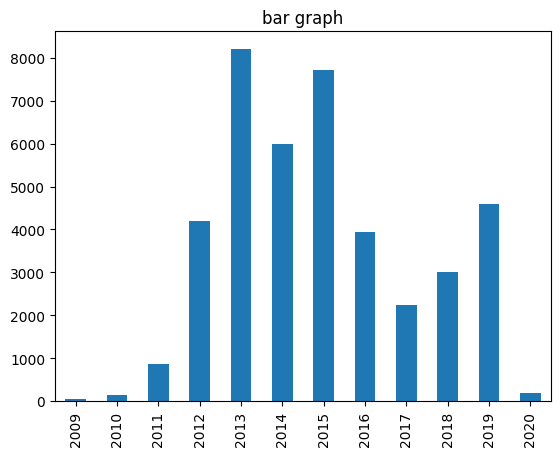

In [3]:
date_df = df['date']

#날짜 요소만 가지고 와서 연/월별로 구분할 예정
date_li = list()
for line in date_df:
    date_li.append(line.strip())

date_year_li = list()
#연 요소만 가지고 오기 
for line in date_li:
    date_year_li.append(line[:4])

date_year_dict = dict()
for date in date_year_li:
    date_year_dict[date] = 0

year_li = list()
freq_li = list()
for key,item in date_year_dict.items():
    freq_li.append(int(date_year_li.count(key)))
    year_li.append(int(key))
 


year_df = pd.Series(freq_li, index = pd.Index(year_li))
year_df.columns=['year', 'freq']
#연도 빈도수 막대그래프로 확인하기
year_df.plot(kind='bar', title= 'bar graph')


year_df.columns


<AxesSubplot: title={'center': 'pie graph'}>

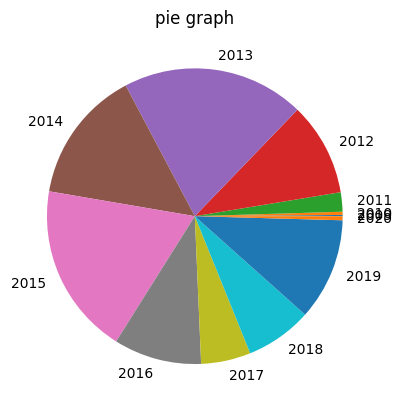

In [4]:
year_df.plot(kind= 'pie', title= 'pie graph')


<AxesSubplot: title={'center': 'line graph'}, xlabel='year', ylabel='frequency'>

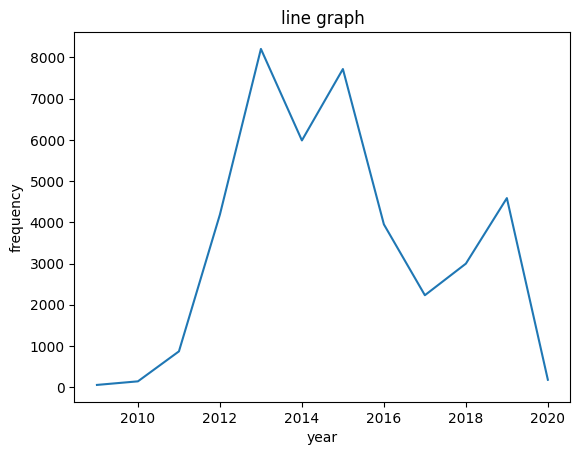

In [5]:
year_df.plot(kind= 'line', title = 'line graph', xlabel = 'year', ylabel = 'frequency')


{'2009': 56, '2010': 143, '2011': 870, '2012': 4190, '2013': 8207, '2014': 5987, '2015': 7719, '2016': 3951, '2017': 2232, '2018': 2998, '2019': 4588, '2020': 181}


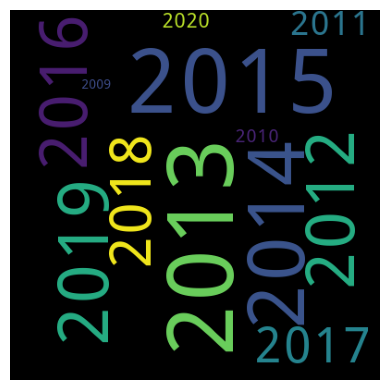

In [6]:
import matplotlib.pyplot as plt
year_freq_dict= dict()
for i in range(len(year_li)):
    year_freq_dict[str(year_li[i])] = freq_li[i]

dict_data = year_freq_dict
print(dict_data)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()
 

### 3-3) Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글에 대한 반응 분석  

In [34]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt 
import wordcloud 
import seaborn as sns

In [30]:
df= pd.read_csv('./trumptweets.csv') 
df.head(3)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN


> column명에 retweets, favorites 이용해서 리트윗이랑 favorites랑 상관계수 확인해보기 및 트윗 게시글 년도에 따른 호감도 확인해보기 

#### 3-3-1) column명에 retweets, favorites 이용해서 리트윗이랑 favorites랑 상관계수 확인해보기

In [31]:
ret_favor_df = df.loc[:,'retweets':'favorites']
ret_favor_df.corr() # -> 좋아요와 리트윗사이에는 비슷한 상관계수를 가지고 있음을 알 수 있다. 

,retweets,favorites
retweets,1.000000,0.944441
favorites,0.944441,1.000000


<AxesSubplot: >

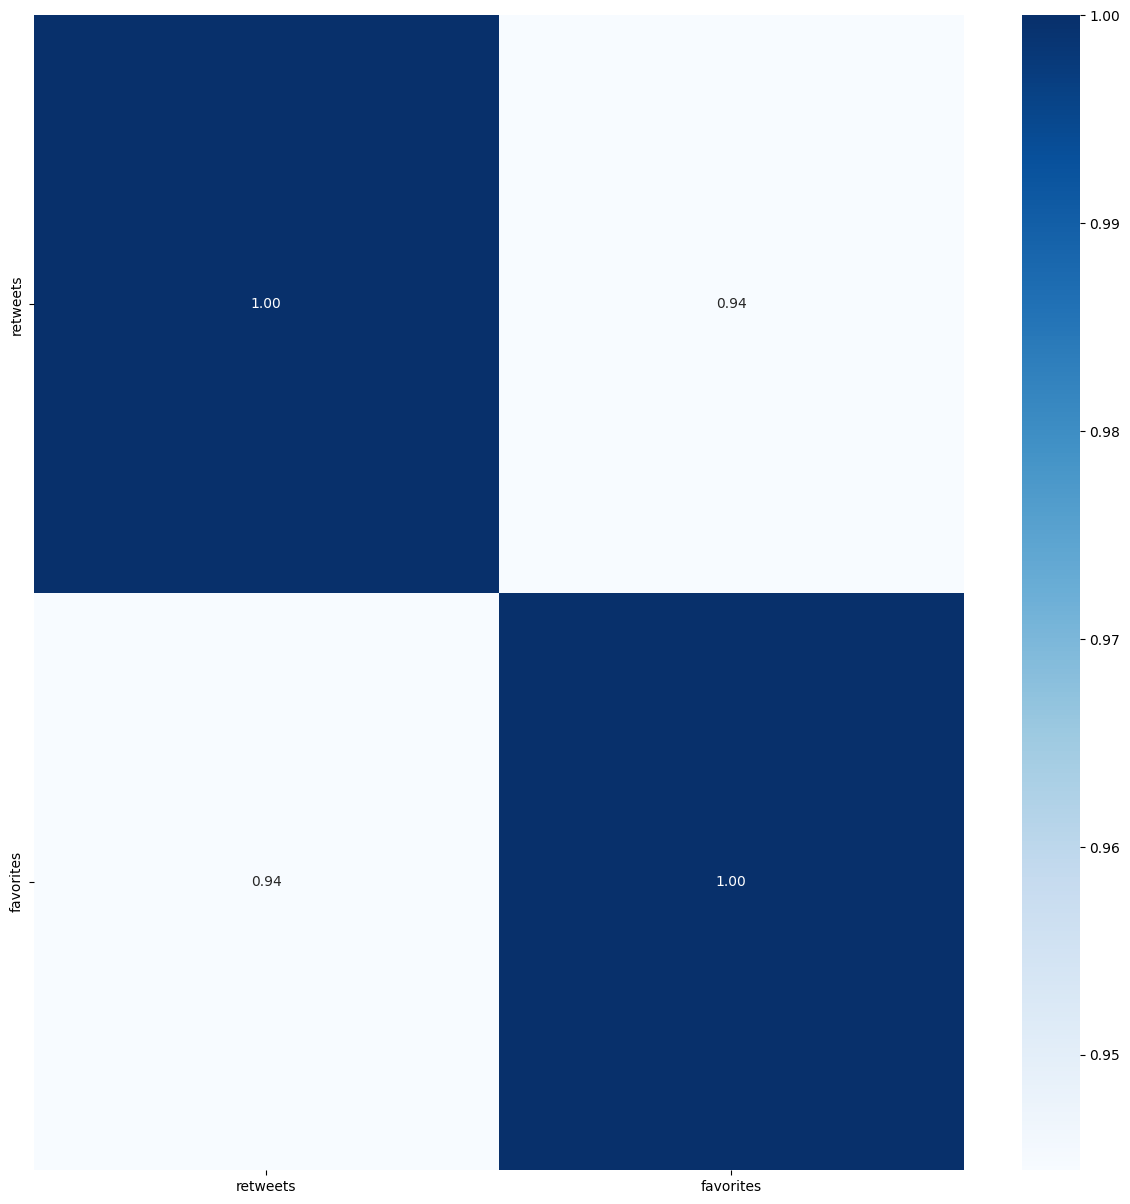

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data = ret_favor_df.corr(), annot=True, 
fmt = '.2f', cmap='Blues')
##비슷한 상관계수를 가짐 

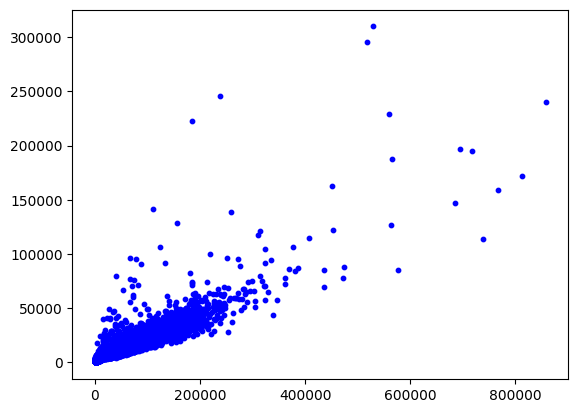

In [51]:
#산점도로도 만들어보자
plt.scatter(ret_favor_df['favorites'], ret_favor_df['retweets'], s=10, c='blue')
#x축 : favorites, y축 : retweets 

 #### 3-3-2) 트윗 게시글 년도에 따른 호감도 확인해보기 

In [ ]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import wordcloud
import seaborn as sns 

In [ ]:
df =pd.read_csv('./trumptweets.csv')
df.head(3)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN


In [ ]:
#사용할 컬럼 date:favorites 
use_df = df.loc[:,'date':'favorites']
use_df

,date,retweets,favorites
0,2009-05-04 20:54:25,500,868
1,2009-05-05 03:00:10,33,273
2,2009-05-08 15:38:08,12,18
3,2009-05-08 22:40:15,11,24
4,2009-05-12 16:07:28,1399,1965
...,...,...,...
41117,2020-01-19 19:24:52,32620,213817
41118,2020-01-19 22:12:20,36239,149571
41119,2020-01-20 01:27:07,16588,66944
41120,2020-01-20 02:16:00,20599,81921


In [ ]:
#사용할 컬럼에서 date를 추출해서 년도별로 나누기
date_li = list(use_df['date'])

for i in range(len(date_li)):
    date_li[i] = date_li[i][:4]
date_li[:10]

['2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009']

In [90]:
#use_df에 넣기
use_df['date'] = date_li 
use_df.head(3)

,date,retweets,favorites
0,2009,500,868
1,2009,33,273
2,2009,12,18


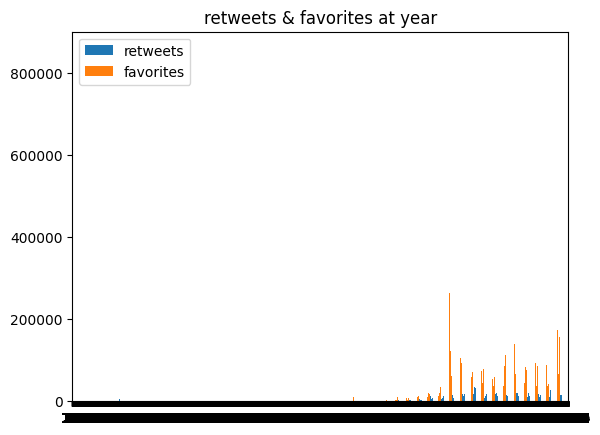

Error in callback <function _draw_all_if_interactive at 0x146905f70> (for post_execute):


KeyboardInterrupt: 

In [125]:
use_df.plot(kind= 'bar')
plt.title("retweets & favorites at year")
plt.show(0)

In [112]:
#연도별로 리트윗/좋아요 수 확인해보기 
count_retweets = dict()
count_favorites = dict()

count_retweets_li = list(use_df['retweets'])
count_favorites_li = list(use_df['favorites'])


for i in list(use_df['date']):
    count_retweets[i] = 0 
    count_favorites[i] = 0 
for i in range(len(list(use_df['date']))):
    count_retweets[use_df['date'][i]] += count_retweets_li[i]
    count_favorites[use_df['date'][i]] += count_favorites_li[i]
    
print("리트윗 : {}".format(count_retweets))
print("좋아요 : {}".format(count_favorites))

리트윗 : {'2009': 3889, '2010': 26707, '2011': 240930, '2012': 2179297, '2013': 2715331, '2014': 1808060, '2015': 4570044, '2016': 26165104, '2017': 37155462, '2018': 55805075, '2019': 88449499, '2020': 5225401}
좋아요 : {'2009': 5925, '2010': 25855, '2011': 170173, '2012': 1587226, '2013': 2492672, '2014': 1995800, '2015': 9202542, '2016': 75884066, '2017': 168645479, '2018': 245880299, '2019': 388123797, '2020': 25346571}


> 리트윗수 연도별로 wordcloud만들어보기 

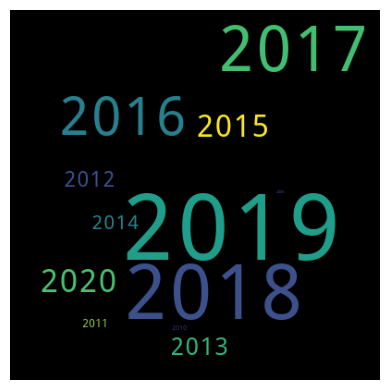

In [116]:
#입력 : 딕셔너리로
dict_data =count_retweets

from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

#2019, 2018, 2017년 순으로 리트윗 된 것이 많음을 알 수 있다. 

> 좋아요수 연도별로 wordcloud만들어보기 

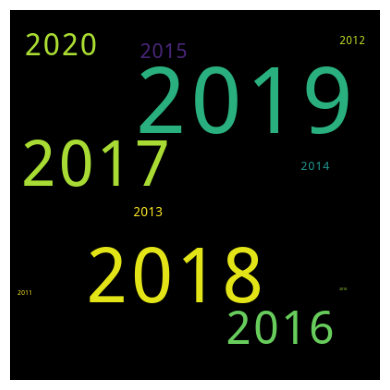

In [121]:
#입력 : 딕셔너리로
dict_data =count_favorites

from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

#2019, 2018, 2017년으로 높다 

> 결론 : 리트윗수와 좋아요수는 비례하다. 좋아하는 사람이 많은 만큼 리트윗수도 증가한다. 상관계수 관계를 확인할 수 있다., 

### 4-1)  비정형 데이터 트윗 텍스를 wordcloud로 생성 및 분석
트럼프가 가장 많이 언급한 키워드는 무엇일지 알아보기 

In [122]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud 


In [124]:
# 데이터 가지고오기
df = pd.read_csv('./trumptweets.csv')
df.head(3)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN


In [ ]:
# 비정형데이터가지고 오기 "content"
content_df = df['content']

